# Quiz 7
Jonah Spicher

In [33]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite, Joint, MakeNormalPmf
import thinkplot
import math
import numpy as np
import scipy

Question 1

In [2]:
x=2
k=3
theta=2
gamma = scipy.special.gamma(k)
p = (1/(gamma*theta**k))*x**(k-1)*np.exp(-x/theta)

0.09196986029286058

Question 2

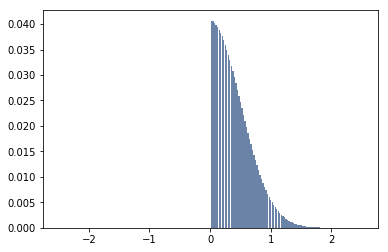

In [13]:
k_prior = MakeNormalPmf(0, 0.5, 5)
for x, p in k_prior.Items():
    if x <=0:
        k_prior[x]=0
        
k_prior.Normalize()
thinkplot.Hist(k_prior)

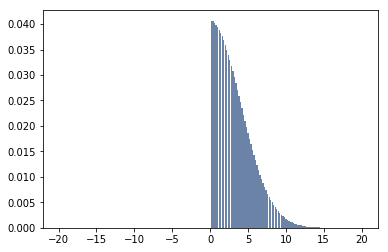

In [9]:
theta_prior = MakeNormalPmf(0, 4, 5)
for x, p in theta_prior.Items():
    if x <=0:
        theta_prior[x]=0
        
theta_prior.Normalize()
thinkplot.Hist(theta_prior)

In [22]:
class rain(Suite, Joint):
    def Likelihood(self, data, hypo):
        """
        hypo: k, theta
        data: Amount of rain, x
        """
        k, theta = hypo
        x = data
        gamma = scipy.special.gamma(k)
        p_rain = (1/(gamma*theta**k))*x**(k-1)*np.exp(-x/theta)
        return p_rain

In [23]:
prior = MakeJoint(k_prior, theta_prior)
rain_ps = rain(prior);

/home/jonah/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


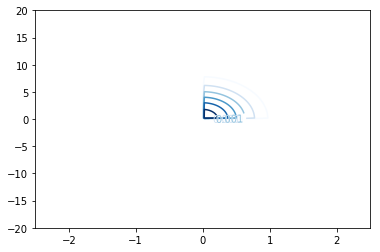

In [24]:
thinkplot.Contour(rain_ps)

In [26]:
datas = [0.78, 0.87, 0.64]
post = rain_ps.Copy()
for data in datas:
    post.Update(data)

/home/jonah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/jonah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


/home/jonah/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


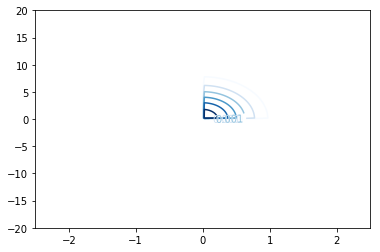

In [27]:
thinkplot.Contour(rain_ps)

In [31]:
ks = rain_ps.Marginal(0)
thetas = rain_ps.Marginal(1)

print(ks.Mean())
print(thetas.Mean())

0.4069760507417834
3.255808405934267


Question 3

/home/jonah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


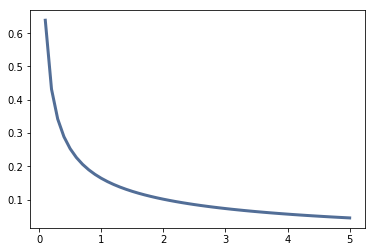

In [40]:
s_k = ks.Sample(100)
s_t = thetas.Sample(100)
xs = np.linspace(0, 5, 51)
pred_rain = Pmf()
for x in xs:
    for k in s_k:
        for t in s_t:
            p_x = rain_ps.Likelihood(data=x, hypo=(k, t))
            pred_rain[x]=p_x
thinkplot.plot(pred_rain)

In [45]:
pred_rain[0]=0 #Had to do this cause it was infinity
pred_rain.Mean() #seems wrong but its five now so oh well

9.756329342020244